# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

**План занятия**

* [Теоретическая часть](#theory)
    * [Основные понятия и обозначения классов](#0)
    * [Линейная регрессия. MSE](#1)
    * [Метод наименьших квадратов](#2)
    * [Градиентный спуск](#3)
* [Практическая часть](#practice)
    * [Пример задачи](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Основные понятия и обозначения<a class="anchor" id="0">

В предыдущих курсах студенты уже знакомились с признаковыми описаниями, основными алгоритмами машинного обучения и Python-библиотеками, используемыми для решения задач в этой области. Однако, перед началом изучения программы курса давайте повторим основные понятия и обозначения, используемые в машинном обучении.

<img src='images/ml.png'>

**Обучение с подкреплением** - испытуемая система (агент) обучается, взаимодействуя с некоторой средой.
<table><tr>
<td> <img src="images/openai1.gif" style="width: 600px;"/> </td>
<td> <img src="images/unnamed.gif" style="width: 450px;"/> </td>
</tr></table>

**Машинное обучение** - дисциплина, заключаящаяся в извлечении знаний из известных данных. Машинное обучение - это раздел математики, поэтому в нем мы будем, помимо всего прочего, работать с формулами.

_Объект_ - то, для чего нужно сделать предсказание. Например, в задаче распознавания спам-почты объектом будет являться письмо. Объекты обозначаются буквой $x$. Множество всех объектов, для которых может потребоваться сделать предсказания, называется _пространством объектов_ и обозначается $\mathbb{X}$.

_Ответ_ - то, что нужно предсказать. В том же примере распознавания спама ответом будет является информация о том, является письмо спамом или нет. Ответы обозначаются буквой $y$ (можно сказать, что $y = y(x)$, так как ответ зависит от объекта). _Пространство ответов_ - множество всех ответов, с которыми мы можем работать. Оно обозначается $\mathbb{Y}$. В примере задачи распознавания спама оно состоит из двух элементов: $+1$ и $-1$ (означающие, что письмо является и не является спамом, соответственно).

Для реализации машинного обучения компьютеру нужно "объяснить" объекты, которые в первоначальном виде он понять не может, с помощью сущностей, ему понятных, например, чисел. Для этого вводится понятие _признаков_. Признак - это некая числовая характеристика объекта. Совокупность всех признаков объекта $x = (x^{1}, x^{2},..., x^{d})$ называется его _признаковым описанием_. Оно является $d$-мерным вектором, то есть к нему можно применять все операции, описанные линейной алгеброй.

<img src='images/spam_data.png'>

Множество значений $i$-го признака будем обозначать $D_{i}$. Существует множество различных видов признаков:

- _Бинарные признаки_ принимают два значения: $D_{i} = \{0,1\}$. Примером  в задаче кредитного скоринга может служить ответ, выше ли доход клиента определенной установленной суммы. При положительном ответе признак полагается равным 1, при отрицательном - 0.

- _Вещественные признаки_ могут принимать в качестве значений все вещественные числа: $D_{i} = \mathbb{R}$. Примерами могут выступать возраст человека, заработная плата, количество звонков в колл-центр в месяц и т.д.

- _Категориальные признаки_ - это такие признаки, значения которых можно сравнивать только на равенство, и нельзя на "больше-меньше". В этом случае $D_{i}$ - неупорядоченное множетсво. Примерами таких признаков могут выступать город, в котором родился клиент банка, или его образование.

- _Порядковые признаки_ - частный случай категориальных признаков. В этом случае $D_{i}$ - упорядоченное множество. Признаки можно сравнивать между собой, но нельзя определить расстояние между ними. Например, то же образование, но с введенным осмысленным порядком (высшее образование больше среднего профессионального, которое в свою очередь больше среднего и т.д.)

- _Множествозначные признаки_ - признаки, значения которых на объекте являются подмножеством некоторого множества. Например, в задачах анализа текстов таким признаком является множество слов, которые входят в текст. Оно является подмножеством большого словаря.

В первой части нашего курса мы рассмотрим алгоритмы _обучения с учителем_ или _контролироемого обучения (supervised learning)_. Данный метод заключается в восстановлении общей закономерности по конечному числу известных примеров.

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых мы планируем строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x^{i}, y_{i})^l_{i=1}.$$

<img src='images/spam_data.png'>

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, помогающая нам делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

Для решения определенной задачи не все алгоритмы одинаково хорошо подходят. Для определения наиболее подходящего алгоритма введена характеристика, называемая _функционалом ошибки_ $Q(a, X)$. Он принимает на вход алгоритм и выборку и сообщает, насколько хорошо данный алгоритм работает на данной выборке. В примере распознавания спам-писем в качестве такого функционала может выступать доля неправильных ответов (предсказаний). Задача обучения заключается в подборе такого алгоритма, при котором достигается минимум функционала ошибки $Q(a, X)\rightarrow min.$

Наиболее подходящий алгоритм при этом выбирается из множества, называемого _семейством алгоритмов_ $\mathbb{A}$. Их мы будем рассматривать в данном курсе.

## Линейная регрессия. MSE<a class="anchor" id="1">

<img src='images/linear_reg.png' width=500px>

Линейные модели - это такие модели, которые сводятся к суммированию значений признаков с некоторыми весами. Само название модели говорит о том, что зависимость предсказываемой переменной от признаков будет линейной:

$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$

**Линейная регрессия** — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

В данном случае параметрами моделей являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_ или _сдвигом_. Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$


<img src="images/spam_data_intercept.png">

Обратим внимание, что сдвиг делает модель неоднородной и затрудняет ее дальнейшую оптимизацию. Для устранения этого фактора обычно используют прием, позволяющий упростить запись: к признаковому описанию объекта добавляется еще один признак (константный), на каждом объекте равный единице. В этом случае вес при нем как раз будет по смыслу совпадать со свободным коэффициентом, и сам $w_{0}$ будет не нужен. Тогда получим

$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$

За счет простой формы линейные модели достаточно легко обучаются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.


|$$a(x)$$  |$$y$$    |$$a(x) - y$$ |$$|a(x) - y|$$ |$$(a(x)-y)^2$$|
|:--------:|:-------:|:-----------:|:-------------:|:------------:|
|11        |10       |1            |1              |1             |
|9         |10       |-1           |1              |1             |
|20        |10       |10           |10             |100           |
|1         |10       |-9           |9              |81            |

Для обучения модели необходимо иметь возможность измерять точность линейного алгоритма на выборке (обучающей или тестовой). 

В качестве меры ошибки можно взять абсолютное отклонение истинного значения от прогноза $Q(a,y)=a(x)-y$, но тогда минимизация функционала ошибки (в которой и состоит задача обучения) будет достигаться при принятии им отрицательного значения. Например, если истинное значение ответа равно $10$, а алгоритм $a(x)$ выдает ответ $11$, отклонение будет равно $1$, а при значении предсказания равном $1$, отклонение будет равно $1-10=-9$. Значение ошибки во втором случае ниже, однако разница истинного значения и предсказания нашей модели больше. Таким образом, такой функционал ошибки не поддается минимизации. 

Логичным кажется решение использовать в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, как мы далее увидим, зачастую методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле, поэтому ее оптимизация бывает затруднительной.

Поэтому сейчас основной способ измерить отклонение - посчитать квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

## Метод наименьших квадратов<a class="anchor" id="2">

Как уже говорилось ранее, обучение модели регрессии заключается в минимизации функционала ошибки. Таким образом, в случае использования среднеквадратичной ошибки получаем задачу оптимизации

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Способ вычисления весов путем минимизации среднеквадратичного отклонения называется **методом наименьших квадратов**.

Заметим, что здесь мы переписали выражение функционала ошибки, заменив $a(x)$ на скалярное призведение $\left \langle w,x \right \rangle$, после чего мы уже имеем функцию, а не функционал ошибки, так как $Q$ зависит не от некоторой функции $a(x)$, а от вектора весов $w$, и оптимизировать нужно именно по нему, что гораздо проще.

Имеет смысл переписать имеющиеся соотношения в матричном виде. В матрицу "объекты-признаки" впишем по строкам $d$ признаков для всех $l$ объектов из обучающей выборки: 

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

и составим вектор ответов $y$ из истинных ответов для данной выборки:

$$y = \begin{pmatrix}
y_{1}\\ 
...\\ 
y_{l}
\end{pmatrix}.$$

Помня, что $w$ - вектор параметров, переписанная в матричном виде задача будет выглядеть следующим образом:

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

где используется евклидова ($L_{2}$) норма:

$$||x|| = \sqrt{\sum_{i=1}^l{x_i^2}} $$

$$||Xw-y|| = \sqrt{\sum_{i=1}^l{(X_iw-y_i)^2}} $$

$$Q(w, X) = \frac{1}{l}\sqrt{\sum_{i=1}^l{(X_iw-y_i)^2}} ^{2} = \frac{1}{l}\sum_{i=1}^l{(X_iw-y_i)^2}$$


$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$

$\frac{2}{l}X^{T}(Xw-y) = 0$

$X^{T}(Xw-y) = 0$

$X^{T}Xw-X^{T}y = 0$

$w = \frac{X^{T}y}{X^{T}X}$

$w = (X^{T}X)^{-1}X^{T}y $


Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации ([ссылка  (см. пункт 1.2)](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) на подробный вывод аналитической формулы решения уравнения линейной регрессии):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии. Наличие аналитического решения кажется положительным фактором, однако, у него есть некоторые минусы, среди которых вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), а также тот факт, что матрица $X^{T}X$ может быть вырожденной и поэтому необратимой. Тогда найти решение будет невозможно.


Более удобным подходом будет разработка решения с помощью численных методов оптимизации, одним из которых является _градиентный спуск_.

## Градиентный спуск<a class="anchor" id="3">

Среднеквадратичная ошибка имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

Вспомним, что _градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки. 

**Градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента.

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$


Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

<img src="images/gradient_descent_lr.gif">

Начальный вектор весов $w_{0}$ также можно определять различными способами, обычно его берут нулевым или состоящим из случайных небольших чисел.

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки 

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


<img src='images/gradient_descent_lr.png' width=600px>

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

Смоделируем работу градиентного спуска при помощи Numpy.

In [1]:
p = 0.7
r = 0.1
(p + r) / 2, 2 * p * r / (p + r)

(0.39999999999999997, 0.175)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
np.random.seed(1234)
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [4]:
display(w, w_true, X, Y)

array([0., 0.])

array([ 0.47143516, -1.19097569])

array([[-0.87181165,  3.99502017],
       [ 3.91966131, -3.18370353],
       [-3.12950043,  4.22621049],
       ...,
       [ 3.51597757,  5.11940305],
       [ 6.35903104,  5.31390661],
       [ 5.12347492,  2.96879971]])

array([-5.71937308e+00,  6.42200487e+00, -6.22754907e+00, -3.61309248e+00,
       -1.24952278e+00, -2.10667534e+00, -1.87408546e+00,  8.06711862e+00,
       -4.75602542e+00, -2.03931948e+00, -5.77773483e-01,  8.32648436e-01,
       -5.55413438e+00, -1.84424278e+00,  3.29500371e+00,  8.02004094e+00,
       -1.64093596e+00, -8.35192303e+00, -6.93743921e+00,  2.59477266e+00,
       -5.89712012e+00,  1.15446630e-01, -4.28621134e+00, -1.65799764e+00,
       -4.20035318e+00,  8.65844888e+00, -5.58161780e+00, -5.24268607e+00,
       -1.93540562e+00, -4.29251150e+00,  6.18523295e+00,  6.04222590e+00,
       -8.96774218e+00,  3.69668619e+00,  3.48567877e-01,  6.04312911e+00,
       -7.57478182e+00, -1.19004926e+00,  8.83052162e-01, -2.55849924e+00,
        1.38656102e-01,  7.32546475e+00, -4.77011812e+00,  2.18687354e+00,
       -2.72725941e+00, -6.67982807e+00, -1.24453429e+00, -4.56700595e+00,
       -5.33599657e+00, -2.02454680e+00, -1.12923894e-01,  8.47399702e+00,
       -4.36753898e+00, -

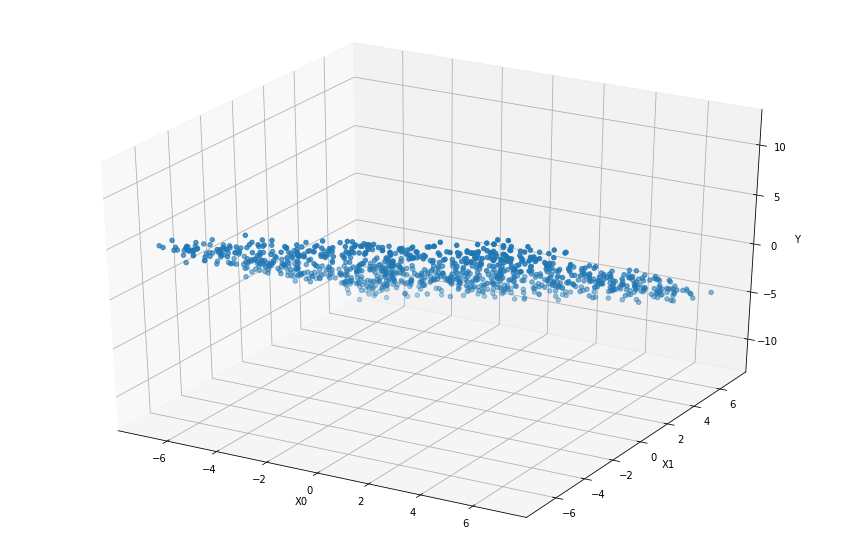

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [22]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.
$$w = (X^{T}X)^{-1}X^{T}y.$$


In [23]:
normal_eq_w = np.linalg.inv(np.dot(X.T, X)) @ X.T @ Y
print(f'Веса {normal_eq_w}')
print(f'В случае использования нормального уравнения функционал ошибки составляет ', end='')
print(f'{round(mserror(X, normal_eq_w, Y), 4)}')

Веса [ 0.46622325 -1.18317886]
В случае использования нормального уравнения функционал ошибки составляет 0.2413


Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

In [24]:
w

array([0., 0.])

In [25]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Iter 0: error - 12.198224910563502, weights: [ 0.13477638 -0.38857461]
Iter 1: error - 5.721927562708121, weights: [ 0.23166602 -0.64911175]
Iter 2: error - 2.757139097172467, weights: [ 0.30088498 -0.82395109]
Iter 3: error - 1.3976931456804218, weights: [ 0.350075   -0.94137792]
Iter 4: error - 0.7734530790003209, weights: [ 0.38487408 -1.02030733]
Iter 5: error - 0.4864474154164298, weights: [ 0.40939674 -1.07340045]
Iter 6: error - 0.3543442315442369, weights: [ 0.42661932 -1.10914011]
Iter 7: error - 0.2934800582148447, weights: [ 0.4386792  -1.13321479]
Iter 8: error - 0.26541385069282625, weights: [ 0.447102   -1.14944239]
Iter 9: error - 0.2524619639743879, weights: [ 0.45297107 -1.16038742]
Iter 10: error - 0.24648103454886586, weights: [ 0.45705232 -1.16777387]
Iter 11: error - 0.24371756626897814, weights: [ 0.45988515 -1.17276152]
Iter 12: error - 0.24244007305388324, weights: [ 0.46184823 -1.17613117]
Iter 13: error - 0.2418492559727374, weights: [ 0.4632066  -1.17840885]


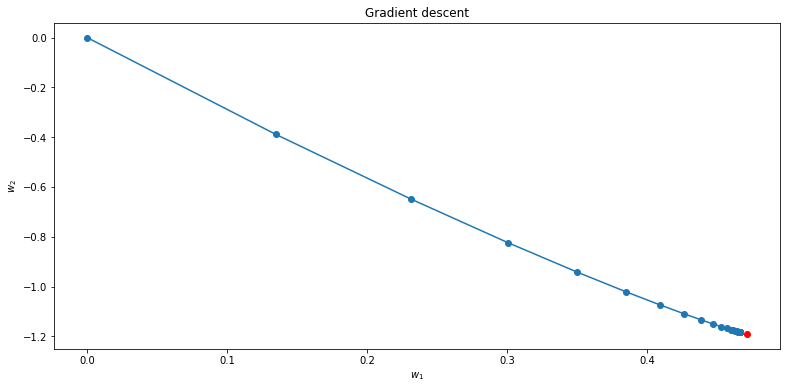

In [26]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

После каждой итерации значения искомых весов приближаются к истинным, однако, не становятся им равны из-за шума, добавленного в вектор ответов.

Text(0, 0.5, 'MSE')

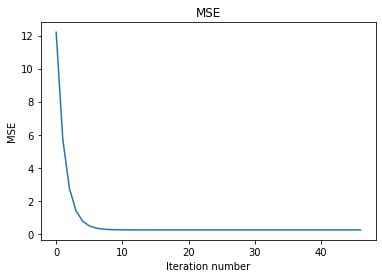

In [27]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Видно, что изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

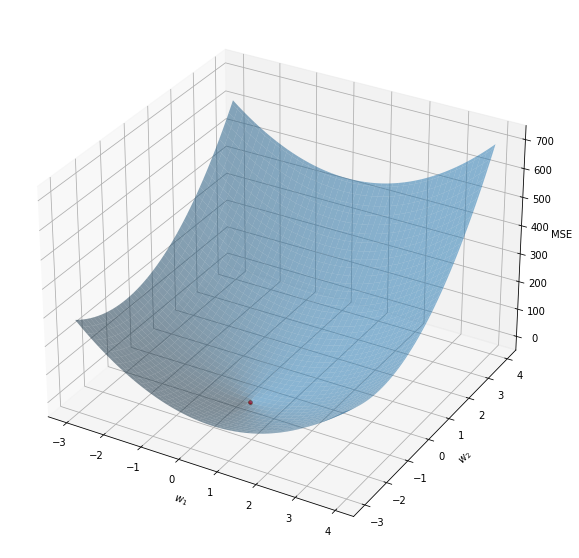

In [28]:
def mse_manual(w1, w2, y_pred):
    w = np.array([w1, w2])
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
w1 = w2 = np.arange(-3.0, 4.0, 0.05)
w1, w2 = np.meshgrid(w1, w2)

zs = np.array([mse_manual(i, j, Y) for i, j in zip(np.ravel(w1), np.ravel(w2))])
Z = zs.reshape(w1.shape)

ax.scatter(w_true[0], w_true[1], mse_manual(w_true[0], w_true[1], Y), c='r', s=10)
ax.scatter(w_pred[0], w_pred[1], mse_manual(w_pred[0], w_pred[1], Y), c='g', s=10)
ax.plot_surface(w1, w2, Z, alpha=.5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel('MSE')

plt.show()

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, то метод будет слишком медленно приближаться к правильному ответу, и потребуется очень большое количество итераций для достижения сходимости. Если же длина наоборот будет слишком большой, появится вероятность "перепрыгивания" алгоритма через минимум функции или вообще отсутствия сходимости градиентного спуска.

Применяется методика использования переменного размера шага: на начальных этапах берется большой шаг, который с увеличением количества итераций снижается. Одна из таких методик - вычисление на каждой итерации размера шага по формуле

$$\eta_{k} = \frac{c}{k},$$

где $c$ - некоторая константа, а $k$ - номер шага.

## Пример задачи<a class="anchor" id="example"></a><center>

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [3]:
import numpy as np

In [4]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [5]:
X.shape

(10, 2)

In [6]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

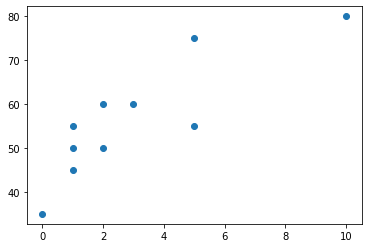

In [9]:
plt.scatter(X[:, 1], y);

Уравнение прямой: $y = a*x + b$

In [10]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0] 
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

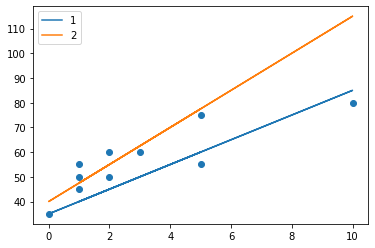

In [11]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.legend()
plt.show()

Отклонение

In [12]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

MAE (Mean Absolute Error)

In [13]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [14]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

### Метод наименьших квадратов (МНК)

$$w = (X^{T}X)^{-1}X^{T}y.$$


In [15]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [16]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

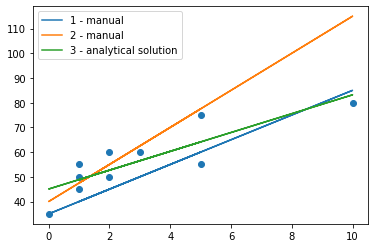

In [17]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1 - manual')
plt.plot(X[:, 1], y_pred2, label='2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [18]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [19]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [20]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [21]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875)

### Градиентный спуск

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


In [22]:
W = np.random.normal(size=(X.shape[1]))
W

array([-0.28761594, -2.5312656 ])

In [23]:
eta = 1e-2 # величина шага

In [24]:
X.shape,  W.shape

((10, 2), (2,))

In [25]:
n = len(y)
dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-128.76282551, -487.78872617])

In [26]:
grad = eta * dQ
grad

array([-1.28762826, -4.87788726])

In [27]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [-0.28761594 -2.5312656 ]
new weights [1.00001231 2.34662166]


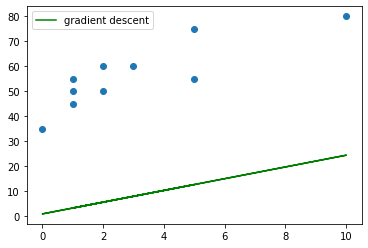

In [28]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [29]:
n = X.shape[1]

eta = 1e-3 
n_iter = 10

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 2        
Learning rate = 0.001        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.54  2.385], MSE = 3047.75


2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [30]:
n = X.shape[1]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 



ValueError: shapes (10,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0)

3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

## Дополнительные материалы

1. [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)
2. [Математическое описание метода градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)
3. [Документация NumPy](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.html)

## Summary

* Линейная регрессия - простой, но зачастую эффективный, способ приближать вещественную целевую переменную через линейную комбинацию признаков
* Решение регрессии - МНК, можно решать аналитически, но на практике - градиентный спуск (GD, Gradient Descent)
* MSE удобна для градиентного спуска, так как дифференцируема
* Максимальное качество градиентного спуска достигается малыми шагами и большим кол-вом итераций

### Опеределения
*Машинное обучение*

**Машинное обучение** — дисциплина, заключаящаяся в извлечении знаний из известных данных. Машинное обучение - это раздел математики, поэтому в нем мы будем, помимо всего прочего, работать с формулами.

**Признак** — это индивидуальное измеримое свойство или характеристика наблюдения.

**Обучающая выборка** — набор структурированных данных, используемый для обучения моделей.

**Обучение с учителем** — это направление машинного обучения, объединяющее алгоритмы и методы построения моделей на основе множества примеров, содержащих пары "известный вход - известный выход".

**Обучение без учителя** — направление машинного обучения, в которой для коррекции параметров обучаемой модели не используется целевая функция. Иными словами, в обучающих примерах при обучении без учителя не нужно иметь заранее заданные выходы модели.

**Обучение с подкреплением** — раздел машинного обучения, изучающий поведение интеллектуальных агентов, действующих в некоторой среде и принимающих решения.
___________

_Линейные модели_

**Линейные модели** — такие модели, которые сводятся к суммированию значений признаков с некоторыми весами

**Линейная регрессия** — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

**Метод наименьших квадратов** — способ вычисления весов линейной модели путем минимизации среднеквадратичного отклонения.
___________

_Градиентный спуск_

**Градиент функции** — $n$-мерный вектор из частных производных. Задает направление наискорейшего роста функции. $$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

**Градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента.